# Refractive Index Sensitivity Simulation: Increment of Glycerol Concentration

In [1]:
%pylab inline

from pame.simparser import LayerSimParser #Interface for handling simulation results
from skspec import *
from skspec.plotting import splot
from skspec.data import aunps_glass

Populating the interactive namespace from numpy and matplotlib
['dti', 'd', 'h', 'm', 'us', 's', 'ms', 'intvl', 'ns']


## Parameters Used

To test the sensitivity of an optical biosensor, we measure the reflection intensity with the change of solvent RI in experiment. To simulate such process in PAME, we build a Stack which comprises four layers:

**Fiber, Linker(Silanes), Bare AuNPs, Solvent(Glycerol/Water) **

1. Linker layer: Silanes of Sellmeier model: A1=6.9, A2=3.2, A3=0.89, B1=1.6, B2=0.0, B3=50.0;

2. AuNP model:  **Lemarchand_11.7nm.yaml, 22nm**; Vfrac **0.1292** (disk coverage: **24.68%**); Check the **Sync solvent material**

5. Solvent layer: composite material **Glycerol & water**. Use **Linear Summation**, glycerol (alpha): **0.0-1.0, 50 steps** and water (beta): 1-alpha;



## Import Simulation Results

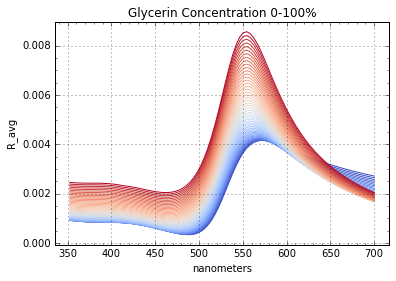

In [26]:
s1=LayerSimParser.load_pickle('../Simulations/glycerin_cn_2.mpickle')
s1.backend='skspec'

ref1=s1.primary_panel()['R_avg'].ix[350:700]
ref1.plot(title='Glycerin Concentration 0-100%')

## Normalize Spectra

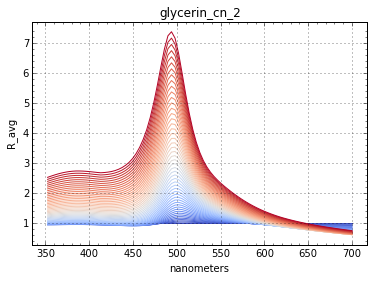

In [3]:
# Normalized 
ref1.reference = 0
ref1.plot(norm='r',title='Glycerin Concentration 0-100%')

ValueError: x and y must have same first dimension

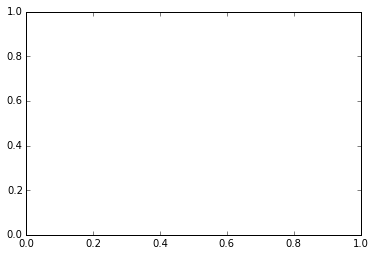

In [32]:
peak_shift = s1.inputs.values()[0]*100,ref1.idxmax()-522.222
glycerol_con = s1.inputs.values()[0]*100

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(glycerol_con, peak_shift)   
###522.222nm: the maximum LSPR wavelength of the AuNP we use
ax.set_xlabel('Glycerol concentration/%')
ax.set_ylabel('LSPR shift')

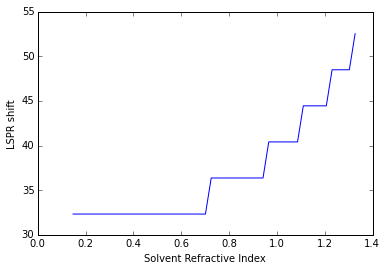

In [25]:
# Calculate the refractive index of mixed glycerol and water solvent
RI = s1.inputs.values()[0]*0.1476+(1-s1.inputs.values()[0])*1.327

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(RI,ref1.idxmax()-522.222)
ax.set_xlabel('Solvent Refractive Index')
ax.set_ylabel('LSPR shift')